### NFL Big Data Bowl 2021: Analyzing Play Types and Yards Gained
##### Tyler Royal
This project analyzes the play types and yards gained of NFL teams during the 2020 season using the NFL Big Data Bowl 2021 dataset. The analysis includes visualizations of the most common play types, the average yards gained per play type, and the relationship between yards to go and play outcome. The project also includes a classification model to predict the success or failure of a play based on its type, possession team, yards to go, and down. Overall, this project provides insights into the effectiveness of different play types and factors that contribute to successful plays in the NFL.

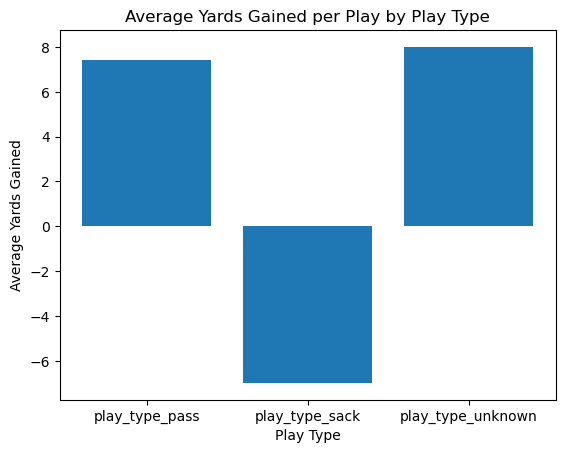

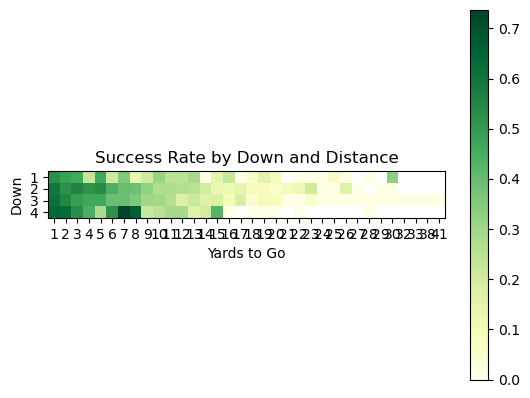

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data and select relevant columns
plays = pd.read_csv('/Users/a19197/Downloads/nfl-big-data-bowl-2021/plays.csv', usecols=['playType', 'possessionTeam', 'yardsToGo', 'down', 'playResult'])
# data downloaded from https://www.kaggle.com/c/nfl-big-data-bowl-2021/data?select=plays.csv

# remove any rows with missing or invalid data
plays = plays.dropna()
plays = plays[(plays['yardsToGo'] > 0) & (plays['down'].isin([1, 2, 3, 4]))]

# calculate the average yards gained per play by play type
playtype_stats = plays.groupby('playType')['playResult'].mean().reset_index()

# plot the results
plt.bar(playtype_stats['playType'], playtype_stats['playResult'])
plt.title('Average Yards Gained per Play by Play Type')
plt.xlabel('Play Type')
plt.ylabel('Average Yards Gained')
plt.show()

# calculate the success rate by down and distance
plays['success'] = plays['playResult'] >= plays['yardsToGo']
success_rate = plays.groupby(['down', 'yardsToGo'])['success'].mean().reset_index()

# pivot the data to create a heatmap
success_rate = success_rate.pivot('down', 'yardsToGo', 'success')

# plot the heatmap
plt.imshow(success_rate, cmap='YlGn')
plt.title('Success Rate by Down and Distance')
plt.xlabel('Yards to Go')
plt.ylabel('Down')
plt.xticks(range(len(success_rate.columns)), success_rate.columns)
plt.yticks(range(len(success_rate.index)), success_rate.index)
plt.colorbar()
plt.show()


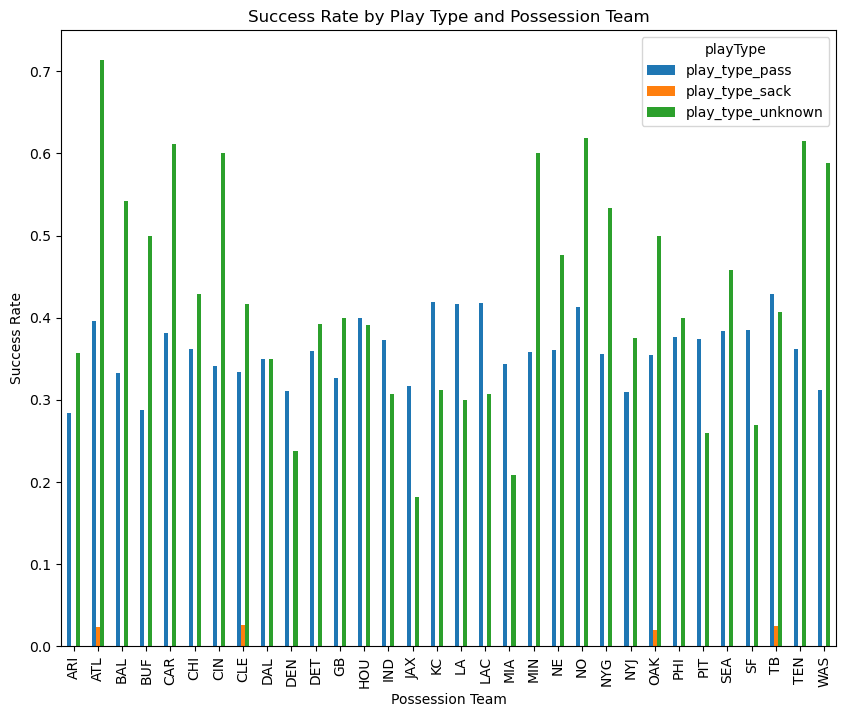

In [24]:
# calculate the success rate by play type and possession team
plays['success'] = plays['playResult'] >= plays['yardsToGo']
success_rate = plays.groupby(['playType', 'possessionTeam'])['success'].mean().reset_index()

# plot the results
fig, ax = plt.subplots(figsize=(10, 8))
ax = success_rate.pivot('possessionTeam', 'playType', 'success').plot(kind='bar', ax=ax)
ax.set_xlabel('Possession Team')
ax.set_ylabel('Success Rate')
ax.set_title('Success Rate by Play Type and Possession Team')
plt.show()

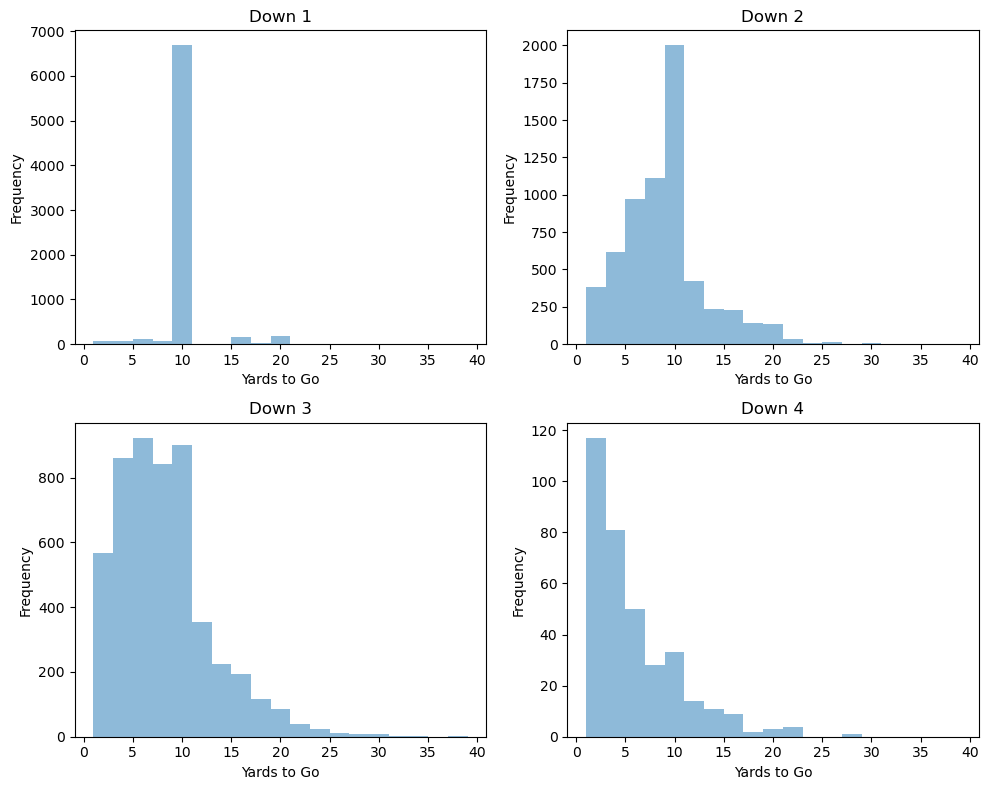

In [25]:
# plot the distribution of yards to go for each down
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, ax in enumerate(axs.ravel()):
    down = i + 1
    data = plays[plays['down'] == down]['yardsToGo']
    ax.hist(data, bins=range(1, 40, 2), alpha=0.5)
    ax.set_title(f'Down {down}')
    ax.set_xlabel('Yards to Go')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

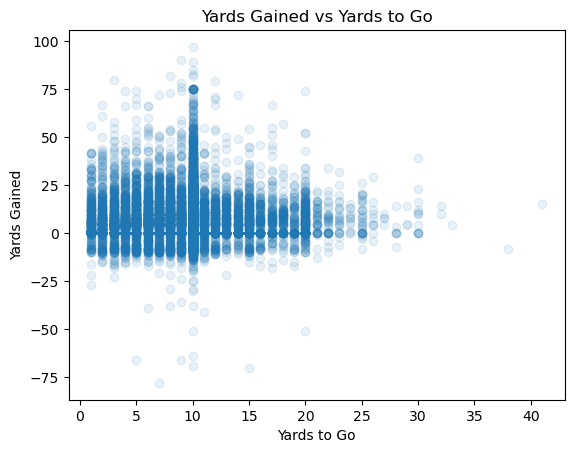

In [26]:
# create a scatter plot of yards gained versus yards to go for all plays
plt.scatter(plays['yardsToGo'], plays['playResult'], alpha=0.1)
plt.title('Yards Gained vs Yards to Go')
plt.xlabel('Yards to Go')
plt.ylabel('Yards Gained')
plt.show()

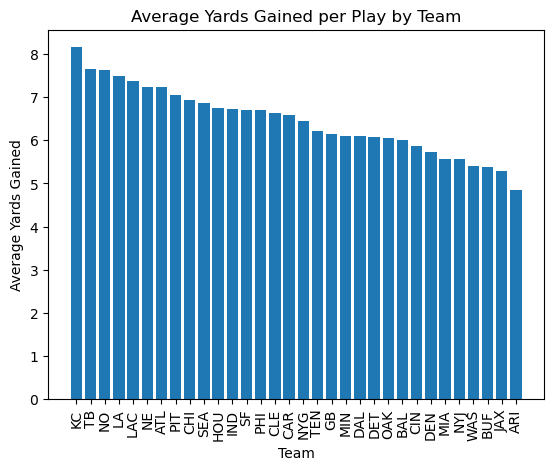

In [27]:
# calculate the average yards gained per play for each team
team_stats = plays.groupby('possessionTeam')['playResult'].mean().reset_index()
team_stats = team_stats.sort_values('playResult', ascending=False)

# plot the results
plt.bar(team_stats['possessionTeam'], team_stats['playResult'])
plt.title('Average Yards Gained per Play by Team')
plt.xlabel('Team')
plt.ylabel('Average Yards Gained')
plt.xticks(rotation=90)
plt.show()